## NAME - AKHILESH JOSHI 
## DIV - B 
## SRN - 02FE22BCS013
## EVAL 02 - 19/11/2024
## SEM - V

### Question- implement linear regression using gradient descent and OOPS concept. 
#### 1. plot graph of mse vs error(cost)
#### 2.plot graph using 5 different learning rates 
#### 3. plot graph for 5 different values of theta 0 and theta 1 
#### 4. perform 70 training and 30 percent testing data as split .
#### 5. gradient descent algorithm should be running instead of running till last epoch when error (cost ) is getting decresed much compared to fe epochs


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st
plt.rcParams['figure.figsize'] = (5.0, 5.0)

data = pd.read_csv(r"C:\anaconda3\3.csv")
data

,1.289136920101263151e+01,5.959460383053750121e+01
0,8.846967,60.556245
1,10.214800,57.384783
2,17.791854,65.514401
3,13.312275,61.032989
4,12.548379,60.122646
...,...,...
594,9.688377,63.119726
595,16.017609,62.251897
596,5.648520,55.473094
597,10.322537,56.966527


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   1.289136920101263151e+01  599 non-null    float64
 1   5.959460383053750121e+01  599 non-null    float64
dtypes: float64(2)
memory usage: 9.5 KB


In [19]:
 class LinearRegressionL2:
        def __init__(self,X_data,Y_data,l,l2,iterations):
            self.X=X_data
            self.Y=Y_data
            #weight and bias
            self.m=0
            self.c=0
            self.L=l 
            self.l2=l2
            self.iter=iterations 
            self.n=float(len(self.X)) 
    
        def cost(self,pred_y): 
            cost=np.sum(np.square(self.Y-pred_y))/(2*self.n) + self.l2*np.sum(np.square(self.m))
            return(cost)
        
        def fit(self):
            self.history=np.zeros(self.iter)
           
            for i in range(self.iter):
                pred_y=self.m*self.X + self.c
             
                Dm= (-1/self.n)*(self.X*(self.Y-pred_y))+2*self.l2*self.m
                Dc= (-1/self.n)*(self.Y-pred_y)
               
                self.m=self.m-Dm*self.L
                self.c=self.c-Dc*self.L
              
                self.history[i]=self.cost(pred_y)
            self.mse=self.MSE(self.Y,pred_y)
                
                
                
       
        def MSE(self,pred_y,Y):
            errors=Y-pred_y
            mse=np.sum(np.square(errors))/self.n
            return mse
        
        def results(self):
            fig=plt.figure(figsize=(14,14))
            a1=fig.add_subplot(211)

            plt.title('minimisation of errors across the iterations')
            a1.plot(self.history)


    
            a2=fig.add_subplot(212)
            final_y=self.m*self.X +self.c 
            plt.scatter(self.X,self.Y)
            plt.title('regrssion line')
            a2.plot([min(self.X),max(self.X)],[min(final_y),max(final_y)],color='red') 
            
            plt.show()
            
            print ('Mean Squared Error=',self.mse)

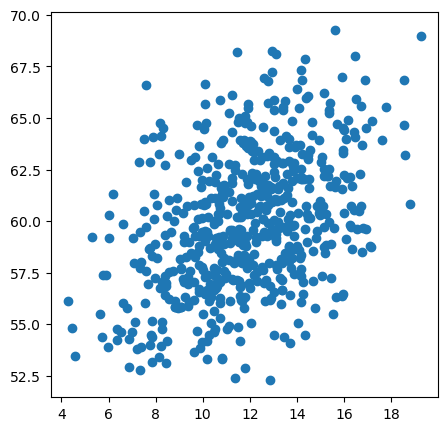

In [20]:
X=data.iloc[:,0]
Y=data.iloc[:,1]
plt.scatter(X,Y)
plt.show()

In [21]:
   l=LinearRegressionL2(X,Y,0.005,0.001,100)
      

In [22]:
  l.fit()

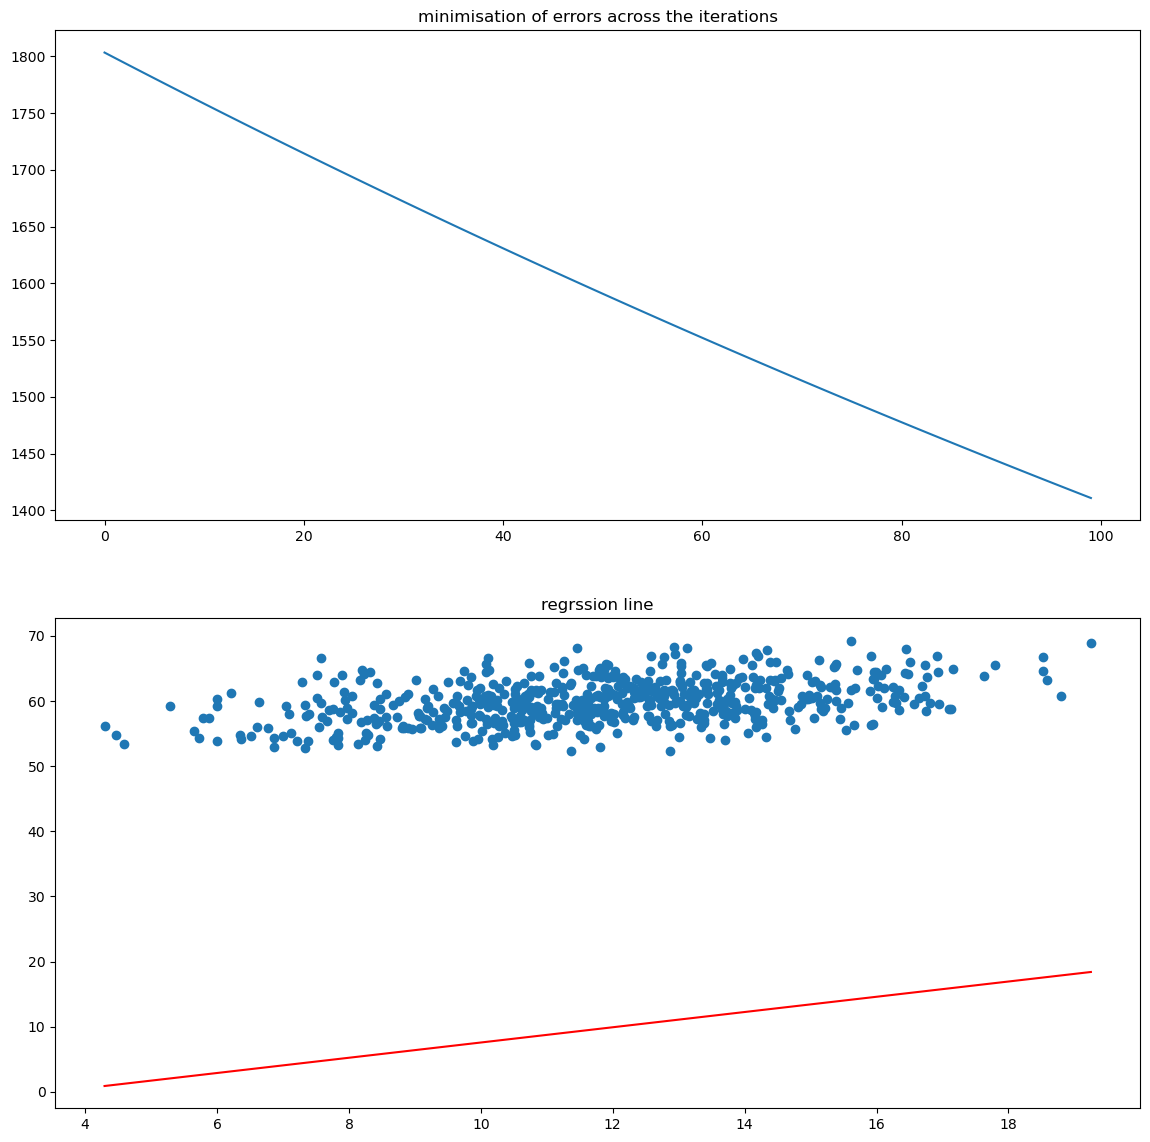

Mean Squared Error= 2821.371199795102


In [23]:
    
            l.results()

In [27]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


print(f"Training Data: {len(X_train)}, Testing Data: {len(X_test)}")

Training Data: 419, Testing Data: 180


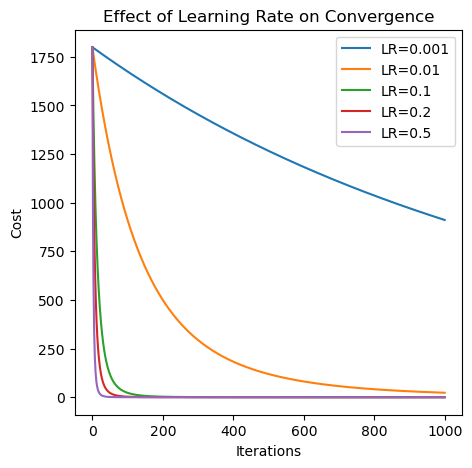

In [28]:
learning_rates = [0.001, 0.01, 0.1, 0.2, 0.5]

for lr in learning_rates:
    
    model = LinearRegressionL2(X_train, y_train, l=lr, l2=0, iterations=1000)
    model.fit()
    
   
    plt.plot(model.history, label=f'LR={lr}')

plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.title('Effect of Learning Rate on Convergence')
plt.show()


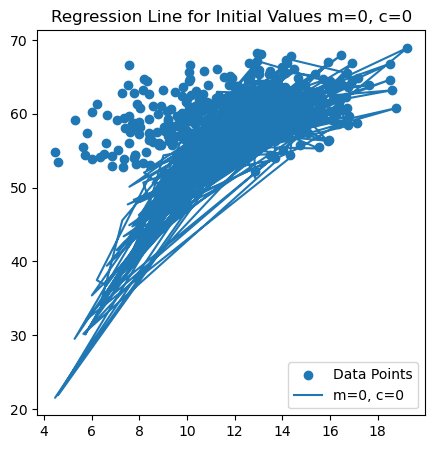

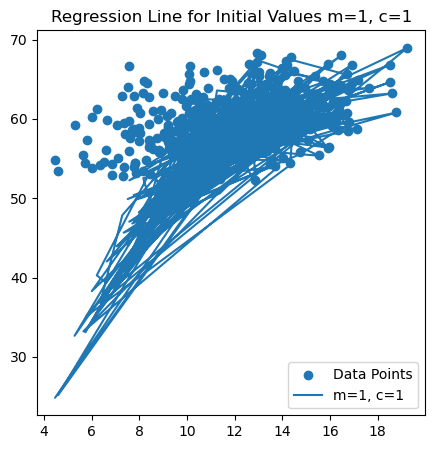

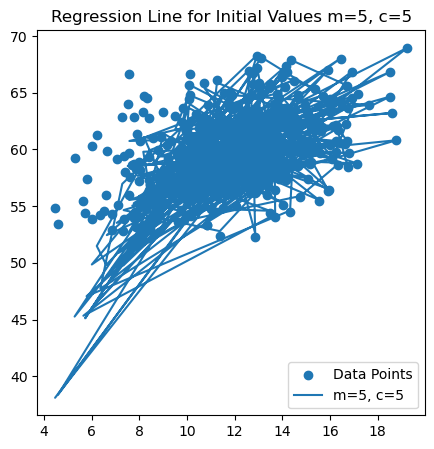

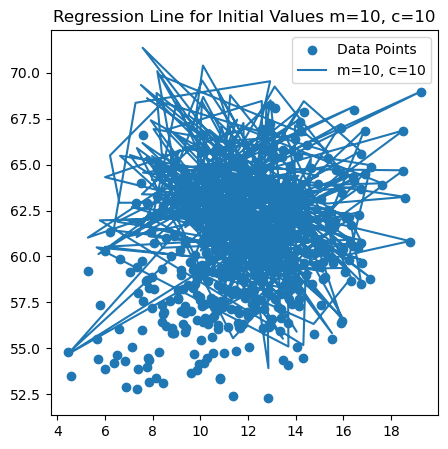

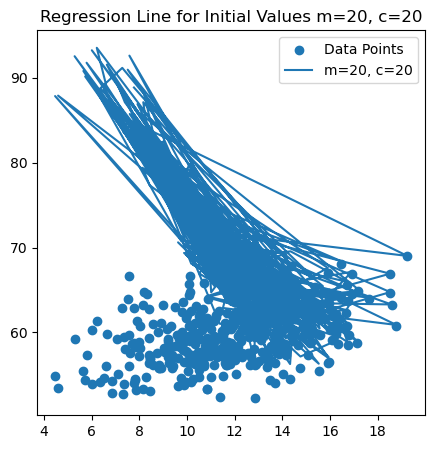

In [29]:
initial_values = [(0, 0), (1, 1), (5, 5), (10, 10), (20, 20)]

for m_init, c_init in initial_values:
 
    model = LinearRegressionL2(X_train, y_train, l=0.01, l2=0, iterations=1000)
    model.m = m_init
    model.c = c_init
    model.fit()


    plt.scatter(X_train, y_train, label='Data Points')
    plt.plot(X_train, model.m * X_train + model.c, label=f'm={m_init}, c={c_init}')
    plt.legend()
    plt.title(f'Regression Line for Initial Values m={m_init}, c={c_init}')
    plt.show()


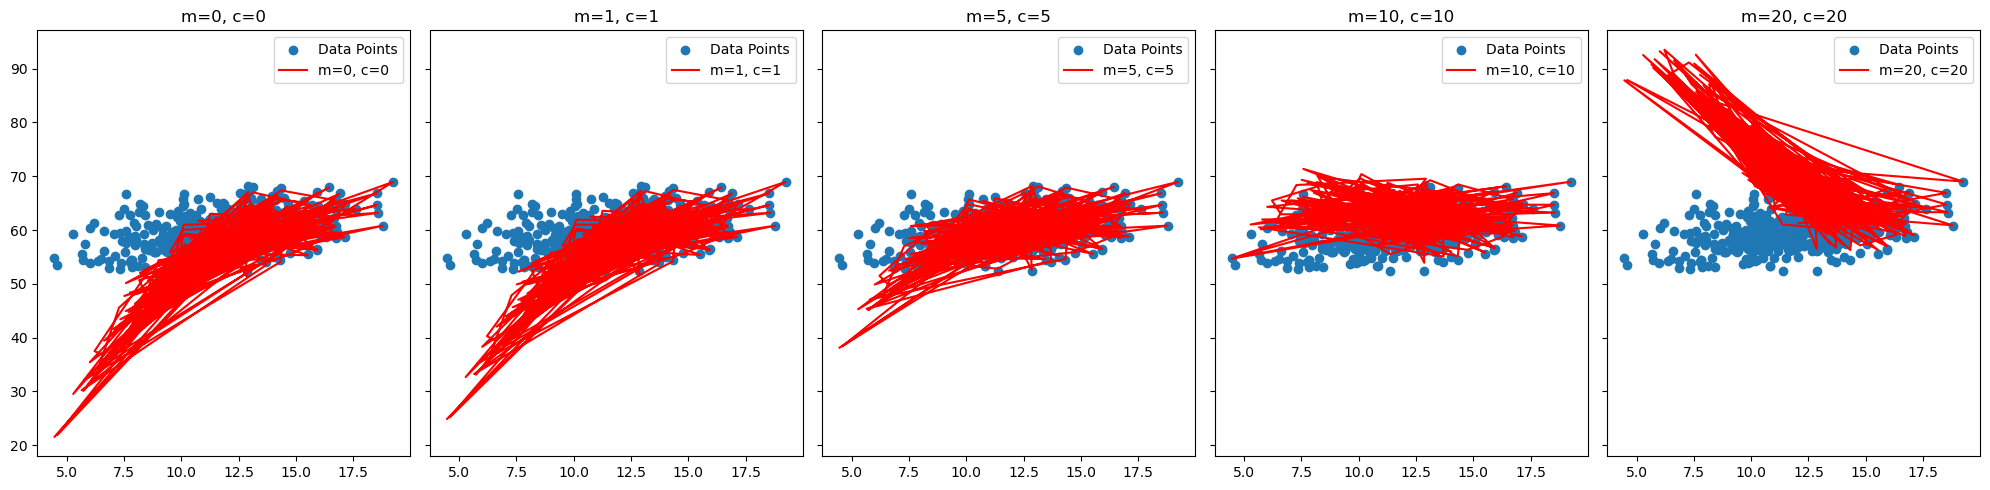

In [39]:
fig, axes = plt.subplots(1, len(initial_values), figsize=(20, 5), sharey=True)

for i, (m_init, c_init) in enumerate(initial_values):
    # Create instance without arguments
    l.X = X_train
    l.Y = y_train
    l.L = 0.01
    l.l2 = 0
    l.iter = 1000
    l.n = float(len(X_train))  # Ensure this is set correctly
    
    # Set initial values
    l.m = m_init
    l.c = c_init
    
    # Fit the model
    l.fit()

    # Plot results
    axes[i].scatter(X_train, y_train, label='Data Points')
    axes[i].plot(X_train, l.m * X_train + l.c, label=f'm={m_init}, c={c_init}', color='r')
    axes[i].legend()
    axes[i].set_title(f'm={m_init}, c={c_init}')

plt.tight_layout()
plt.show()


In [34]:
class LinearRegressionL2:
    def fit(self):
        self.history = []
        prev_cost = float('inf')
        tolerance = 1e-6  

        for i in range(self.iter):
            pred_y = self.m * self.X + self.c
            current_cost = self.cost(pred_y)

            
            if abs(prev_cost - current_cost) < tolerance:
                print(f"Stopping early at iteration {i}")
                break

            prev_cost = current_cost

            Dm = (-1 / self.n) * (self.X * (self.Y - pred_y)) + 2 * self.l2 * self.m
            Dc = (-1 / self.n) * (self.Y - pred_y)
            self.m -= self.L * Dm
            self.c -= self.L * Dc

            self.history.append(current_cost)


In [31]:
pd.DataFrame({'Iteration': range(len(model.history)), 'Cost': model.history}).to_csv('cost_history.csv', index=False)

print(f"Trained Model: m={model.m}, c={model.c}")


Trained Model: m=108     2.968586
272     2.393404
598     3.058422
479     4.984033
436    10.736120
         ...    
71      6.071442
106     4.065140
270     2.785427
435     2.517979
102     9.040458
Length: 419, dtype: float64, c=108    18.792303
272    18.894271
598    18.831988
479    18.598418
436    18.578028
         ...    
71     18.512039
106    18.670478
270    18.871236
435    18.949310
102    18.589879
Length: 419, dtype: float64
